<a href="https://colab.research.google.com/github/patrickanaku/MCS-7103-Machine-Learning/blob/main/EDA_CONFLICT_DATA_FOR_AFRICA_1997_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory Data Analysis of the ACLED Conflict Data for Africa 1997-2016**

The raw dataset was collected from ACLED website, this dataset is a collection reported information on the type, agents, location, date, and other characteristics of political violence events, demonstration events, and other select non-violent, politically relevant developments in every country and territory in the world. Below is a link to the dataset and explantion of the features in the dataset respectivily.

https://data.world/acled/71d852e4-e41e-4320-a770-9fc2bb87fb64

https://acleddata.com/acleddatanew/wp-content/uploads/dlm_uploads/2023/06/ACLED_Codebook_2023.pdf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
!pip install plotly
!pip install geopandas
!pip install alluvial
!pip install wordcloud
!pip install circlify

from wordcloud import WordCloud, STOPWORDS
import circlify

ERROR: Could not find a version that satisfies the requirement alluvial (from versions: none)
ERROR: No matching distribution found for alluvial


In [5]:
africadata = pd.read_csv('/content/drive/MyDrive/MCSC1/dataset/acled-all-africa-1997-2016.csv', encoding='latin-1', low_memory=False)

# **A QUICK LOOK INTO THE DATASET**

A first look at the dataset to get a glimps of it by sampling the first and last 7 values.

In [ ]:
africadata.head(7)

GWNO EVENT_ID_CNTY  EVENT_ID_NO_CNTY EVENT_DATE  YEAR  TIME_PRECISION  \
0   615         16ALG                16   1/2/1997  1997               1   
1   615         39ALG                39   2/6/1997  1997               1   
2   615         45ALG                45   2/7/1997  1997               1   
3   615         77ALG                77   2/9/1997  1997               1   
4   615         87ALG                87  2/10/1997  1997               1   
5   615         88ALG                88  2/10/1997  1997               1   
6   615         90ALG                90  2/10/1997  1997               1   

                   EVENT_TYPE                    ACTOR1 ALLY_ACTOR_1  INTER1  \
0  Violence against civilians  GIA: Armed Islamic Group          NaN       2   
1             Remote violence  GIA: Armed Islamic Group          NaN       2   
2  Violence against civilians  GIA: Armed Islamic Group          NaN       2   
3  Violence against civilians  GIA: Armed Islamic Group          NaN       2   
4  Violence against civilians  GIA: Armed Islamic Group          NaN       2   
5  Violence against civilians  GIA: Armed Islamic Group          NaN       2   
6  Violence against civilians  GIA: Armed Islamic Group          NaN       2   

   ...              ADMIN1        ADMIN2 ADMIN3       LOCATION  LATITUDE  \
0  ...  Bordj Bou Arreridj        Tixter    NaN  Mechta Larbaa   36.0466   
1  ...               Alger   Sidi MHamed    NaN        Algiers   36.7525   
2  ...             Mascara        Benian    NaN  Chabet Larbaa   35.0961   
3  ...             Mascara      Tighenif    NaN    Ouled Larbi   35.4156   
4  ...               Medea     Seghouane    NaN   Chaba Melaha   36.0101   
5  ...           Boumerdes  El Kharrouba    NaN      Kharrouba   36.6551   
6  ...               Medea     Seghouane    NaN      Seghouane   36.0014   

   LONGITUDE GEO_PRECISION                 SOURCE  \
0     5.1317             1  www.algeria-watch.org   
1      3.042             1  www.algeria-watch.org   
2     0.2078             1  www.algeria-watch.org   
3     0.2825             1  www.algeria-watch.org   
4     2.8989             1  www.algeria-watch.org   
5     3.4071             1  www.algeria-watch.org   
6     2.9033             1  www.algeria-watch.org   

                                               NOTES FATALITIES  
0  1 February: 7 citizens of a farming estate (Ha...          7  
1  2 June: Explosion of a bomb in the working-cla...         10  
2  2 July: 4 people of the same family were kille...          4  
3  2 September: 22 citizen including 10 children ...         22  
4  2 Oct 1997: 37 people were killed in the villa...         37  
5  2 October: 14 people were killed in the villag...         14  
6  13 members of the same family including women ...         13  

[7 rows x 28 columns]

In [ ]:
africadata.tail(7)

GWNO EVENT_ID_CNTY  EVENT_ID_NO_CNTY  EVENT_DATE  YEAR  \
140740   552       1635ZIM            136782  31/12/2002  2002   
140741   552       1634ZIM            136781  31/12/2002  2002   
140742   552       1987ZIM            137134  31/12/2003  2003   
140743   552       1986ZIM            137133  31/12/2003  2003   
140744   552       1988ZIM            137135  31/12/2003  2003   
140745   552       1989ZIM            137136  31/12/2003  2003   
140746   552       4728ZIM            139875  31/12/2012  2012   

        TIME_PRECISION                  EVENT_TYPE  \
140740               1  Violence against civilians   
140741               1  Violence against civilians   
140742               1  Violence against civilians   
140743               1  Violence against civilians   
140744               1  Violence against civilians   
140745               1  Violence against civilians   
140746               1              Riots/Protests   

                                                   ACTOR1  \
140740                Unidentified Armed Group (Zimbabwe)   
140741                Unidentified Armed Group (Zimbabwe)   
140742  ZANU-PF: Zimbabwe African National Union-Patri...   
140743                  Police Forces of Zimbabwe (1987-)   
140744  ZANU-PF: Zimbabwe African National Union-Patri...   
140745  ZNLWVA: Zimbabwe National Liberation War Veter...   
140746                              Protesters (Zimbabwe)   

                                             ALLY_ACTOR_1  INTER1  ...  \
140740                                                NaN       3  ...   
140741                                                NaN       3  ...   
140742                                                NaN       3  ...   
140743                                                NaN       1  ...   
140744                                                NaN       3  ...   
140745  ZANU-PF: Zimbabwe African National Union-Patri...       3  ...   
140746                                                NaN       6  ...   

                  ADMIN1    ADMIN2                    ADMIN3     LOCATION  \
140740          Masvingo  Masvingo     Masvingo Municipality     Masvingo   
140741            Harare    Harare  Chitungwiza Municipality  Chitungwiza   
140742            Harare    Harare       Harare City Council    Highfield   
140743  Mashonaland West  Hurungwe              Hurungwe RDC   Muzarabani   
140744  Mashonaland East   Murehwa               Murehwa RDC      Murehwa   
140745          Masvingo      Gutu                  Gutu RDC         Gutu   
140746  Mashonaland East      Seke               Manyame RDC     Beatrice   

        LATITUDE  LONGITUDE GEO_PRECISION  \
140740  -20.0833    30.8333             1   
140741  -18.0127    31.0756             1   
140742  -17.8858    30.9919             1   
140743  -15.7500    29.3333             1   
140744  -17.6469    31.7775             1   
140745  -19.6500    31.1667             1   
140746  -18.2833    30.8666             1   

                                               SOURCE  \
140740       Zimbabwe Human Rights NGO Forum Feb 2003   
140741       Zimbabwe Human Rights NGO Forum Feb 2003   
140742  Zimbabwe Human Rights Forum NGO February 2004   
140743  Zimbabwe Human Rights Forum NGO February 2004   
140744  Zimbabwe Human Rights Forum NGO February 2004   
140745  Zimbabwe Human Rights Forum NGO February 2004   
140746                            The Herald (Harare)   

                                                    NOTES FATALITIES  
140740                                Beating and torture          0  
140741                      Politically motivated beating          0  
140742                                                NaN          0  
140743                                                NaN          0  
140744                                                NaN          0  
140745                                                NaN          0  
140746  Farm workers stage demon

In [ ]:
list(africadata.columns)

['GWNO',
 'EVENT_ID_CNTY',
 'EVENT_ID_NO_CNTY',
 'EVENT_DATE',
 'YEAR',
 'TIME_PRECISION',
 'EVENT_TYPE',
 'ACTOR1',
 'ALLY_ACTOR_1',
 'INTER1',
 'ACTOR1_ID',
 'ACTOR2',
 'ALLY_ACTOR_2',
 'INTER2',
 'ACTOR2_ID',
 'INTERACTION',
 'ACTOR_DYAD_ID',
 'COUNTRY',
 'ADMIN1',
 'ADMIN2',
 'ADMIN3',
 'LOCATION',
 'LATITUDE',
 'LONGITUDE',
 'GEO_PRECISION',
 'SOURCE',
 'NOTES',
 'FATALITIES']

In [ ]:
africadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140747 entries, 0 to 140746
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   GWNO              140747 non-null  int64  
 1   EVENT_ID_CNTY     140747 non-null  object 
 2   EVENT_ID_NO_CNTY  140747 non-null  int64  
 3   EVENT_DATE        140747 non-null  object 
 4   YEAR              140747 non-null  int64  
 5   TIME_PRECISION    140747 non-null  int64  
 6   EVENT_TYPE        140747 non-null  object 
 7   ACTOR1            140747 non-null  object 
 8   ALLY_ACTOR_1      22627 non-null   object 
 9   INTER1            140747 non-null  int64  
 10  ACTOR1_ID         140747 non-null  int64  
 11  ACTOR2            105460 non-null  object 
 12  ALLY_ACTOR_2      16028 non-null   object 
 13  INTER2            140747 non-null  int64  
 14  ACTOR2_ID         140747 non-null  int64  
 15  INTERACTION       140747 non-null  int64  
 16  ACTOR_DYAD_ID     14

In [ ]:
africadata.describe()

GWNO  EVENT_ID_NO_CNTY           YEAR  TIME_PRECISION  \
count  140747.000000     140747.000000  140747.000000   140747.000000   
mean      536.733977      70374.000000    2009.797068        1.146483   
std        61.466162      40630.303506       5.861164        0.455928   
min       404.000000          1.000000    1997.000000        1.000000   
25%       490.000000      35187.500000    2005.000000        1.000000   
50%       520.000000      70374.000000    2012.000000        1.000000   
75%       600.000000     105560.500000    2014.000000        1.000000   
max       651.000000     140747.000000    2016.000000        3.000000   

              INTER1      ACTOR1_ID         INTER2      ACTOR2_ID  \
count  140747.000000  140747.000000  140747.000000  140747.000000   
mean        3.327069    2587.796692       3.259053    1211.638820   
std         2.017384    1030.065824       2.926986    1242.978894   
min         1.000000       1.000000       0.000000       0.000000   
25%         1.000000    2081.000000       0.000000       0.000000   
50%         3.000000    3043.000000       2.000000     675.000000   
75%         5.000000    3288.000000       7.000000    2229.000000   
max         8.000000    3960.000000       8.000000    3960.000000   

         INTERACTION       LATITUDE  GEO_PRECISION     FATALITIES  
count  140747.000000  140747.000000  140747.000000  140747.000000  
mean       31.514015       5.076742       1.263743       4.878143  
std        18.090411      16.160877       0.528826      82.492418  
min        10.000000     -34.710100       1.000000       0.000000  
25%        14.000000      -1.693300       1.000000       0.000000  
50%        27.000000       4.681500       1.000000       0.000000  
75%        47.000000      11.846400       1.000000       1.000000  
max        88.000000      37.274400       3.000000   25000.000000

In [ ]:
africadata.shape

(140747, 28)

In [ ]:
africadata.isnull().sum()

GWNO                     0
EVENT_ID_CNTY            0
EVENT_ID_NO_CNTY         0
EVENT_DATE               0
YEAR                     0
TIME_PRECISION           0
EVENT_TYPE               0
ACTOR1                   0
ALLY_ACTOR_1        118120
INTER1                   0
ACTOR1_ID                0
ACTOR2               35287
ALLY_ACTOR_2        124719
INTER2                   0
ACTOR2_ID                0
INTERACTION              0
ACTOR_DYAD_ID            0
COUNTRY                  0
ADMIN1                   0
ADMIN2                 114
ADMIN3               65452
LOCATION                 3
LATITUDE                 0
LONGITUDE                0
GEO_PRECISION            0
SOURCE                 173
NOTES                10227
FATALITIES               0
dtype: int64

In [ ]:
africadata.dtypes

GWNO                  int64
EVENT_ID_CNTY        object
EVENT_ID_NO_CNTY      int64
EVENT_DATE           object
YEAR                  int64
TIME_PRECISION        int64
EVENT_TYPE           object
ACTOR1               object
ALLY_ACTOR_1         object
INTER1                int64
ACTOR1_ID             int64
ACTOR2               object
ALLY_ACTOR_2         object
INTER2                int64
ACTOR2_ID             int64
INTERACTION           int64
ACTOR_DYAD_ID        object
COUNTRY              object
ADMIN1               object
ADMIN2               object
ADMIN3               object
LOCATION             object
LATITUDE            float64
LONGITUDE            object
GEO_PRECISION         int64
SOURCE               object
NOTES                object
FATALITIES            int64
dtype: object

# **DATA CLEANING**

Here I am mainly renaming some colunms to reflect the meaning of the feature it contains.

In [6]:
import re

africadata = africadata.rename(columns={'EVENT_ID_CNTY': 'EVENT_COUNTRY_ID', 'EVENT_ID_NO_CNTY': 'EVENT_ID', 'YEAR': 'EVENT_YEAR',
                                        'SOURCE': 'EVENT_SOURCE', 'NOTES': 'DESCRIPTION'})

# Loop through the columns of africadata DataFrame
for col in africadata.columns:
    # Check if the column matches the pattern 'ADMIN' followed by digits
    match_admin = re.match(r'ADMIN(\d+)', col)
    if match_admin:
        # If a match is found, rename the column to 'ADMINISTRATIVE_REGION-<number>'
        new_col = f'ADMINISTRATIVE_REGION_{match_admin.group(1)}'
        africadata = africadata.rename(columns={col: new_col})

    # Check if the column matches the pattern 'INTER' followed by digits
    match_inter = re.match(r'INTER(\d+)', col)
    if match_inter:
        # If a match is found, rename the column to 'ACTOR_TYPE-<number>'
        new_col = f'ACTOR_TYPE_{match_inter.group(1)}'
        africadata = africadata.rename(columns={col: new_col})




In [9]:
africadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140747 entries, 0 to 140746
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   GWNO                     140747 non-null  int64  
 1   EVENT_COUNTRY_ID         140747 non-null  object 
 2   EVENT_ID                 140747 non-null  int64  
 3   EVENT_DATE               140747 non-null  object 
 4   EVENT_YEAR               140747 non-null  int64  
 5   TIME_PRECISION           140747 non-null  int64  
 6   EVENT_TYPE               140747 non-null  object 
 7   ACTOR1                   140747 non-null  object 
 8   ALLY_ACTOR_1             22627 non-null   object 
 9   ACTOR_TYPE_1             140747 non-null  int64  
 10  ACTOR1_ID                140747 non-null  int64  
 11  ACTOR2                   105460 non-null  object 
 12  ALLY_ACTOR_2             16028 non-null   object 
 13  ACTOR_TYPE_2             140747 non-null  int64  
 14  ACTO

In [ ]:
list(africadata.columns)

['GWNO',
 'EVENT_COUNTRY_ID',
 'EVENT_ID',
 'EVENT_DATE',
 'EVENT_YEAR',
 'TIME_PRECISION',
 'EVENT_TYPE',
 'ACTOR1',
 'ALLY_ACTOR_1',
 'ACTOR_TYPE_1',
 'ACTOR1_ID',
 'ACTOR2',
 'ALLY_ACTOR_2',
 'ACTOR_TYPE_2',
 'ACTOR2_ID',
 'INTERACTION',
 'ACTOR_DYAD_ID',
 'COUNTRY',
 'ADMINISTRATIVE_REGION_1',
 'ADMINISTRATIVE_REGION_2',
 'ADMINISTRATIVE_REGION_3',
 'LOCATION',
 'LATITUDE',
 'LONGITUDE',
 'GEO_PRECISION',
 'EVENT_SOURCE',
 'DESCRIPTION',
 'FATALITIES']

# **FEATURE EXPLORATION**

First I extract and display the two types of features i.e numerical and categorical

In [ ]:
# Select and extract numerical features
numerical_features = africadata.select_dtypes(include=['int64', 'float64'])

# Display features
print("Numerical Features:")
print(numerical_features.head(10))

Numerical Features:
   GWNO  EVENT_ID  EVENT_YEAR  TIME_PRECISION  ACTOR_TYPE_1  ACTOR1_ID  \
0   615        16        1997               1             2       1071   
1   615        39        1997               1             2       1071   
2   615        45        1997               1             2       1071   
3   615        77        1997               1             2       1071   
4   615        87        1997               1             2       1071   
5   615        88        1997               1             2       1071   
6   615        90        1997               1             2       1071   
7   615        89        1997               1             2       1071   
8   615        17        1997               1             2       1071   
9   615        25        1997               1             2       1071   

   ACTOR_TYPE_2  ACTOR2_ID  INTERACTION  LATITUDE  GEO_PRECISION  FATALITIES  
0             7        636           27   36.0466              1           7  
1      

In [ ]:
# Select and extract categorical features
categorical_features = africadata.select_dtypes(include=['object'])

# Display  features
print("\nCategorical Features:")
print(categorical_features.head(10))


Categorical Features:
  EVENT_COUNTRY_ID EVENT_DATE                  EVENT_TYPE  \
0            16ALG   1/2/1997  Violence against civilians   
1            39ALG   2/6/1997             Remote violence   
2            45ALG   2/7/1997  Violence against civilians   
3            77ALG   2/9/1997  Violence against civilians   
4            87ALG  2/10/1997  Violence against civilians   
5            88ALG  2/10/1997  Violence against civilians   
6            90ALG  2/10/1997  Violence against civilians   
7            89ALG  2/10/1997  Violence against civilians   
8            17ALG   3/2/1997  Violence against civilians   
9            25ALG   3/4/1997  Violence against civilians   

                     ACTOR1 ALLY_ACTOR_1               ACTOR2 ALLY_ACTOR_2  \
0  GIA: Armed Islamic Group          NaN  Civilians (Algeria)          NaN   
1  GIA: Armed Islamic Group          NaN  Civilians (Algeria)          NaN   
2  GIA: Armed Islamic Group          NaN  Civilians (Algeria)          

# Exploring Categorical Features.

A bar chart to visualize event types by country

Text(0, 0.5, 'Number of Events')

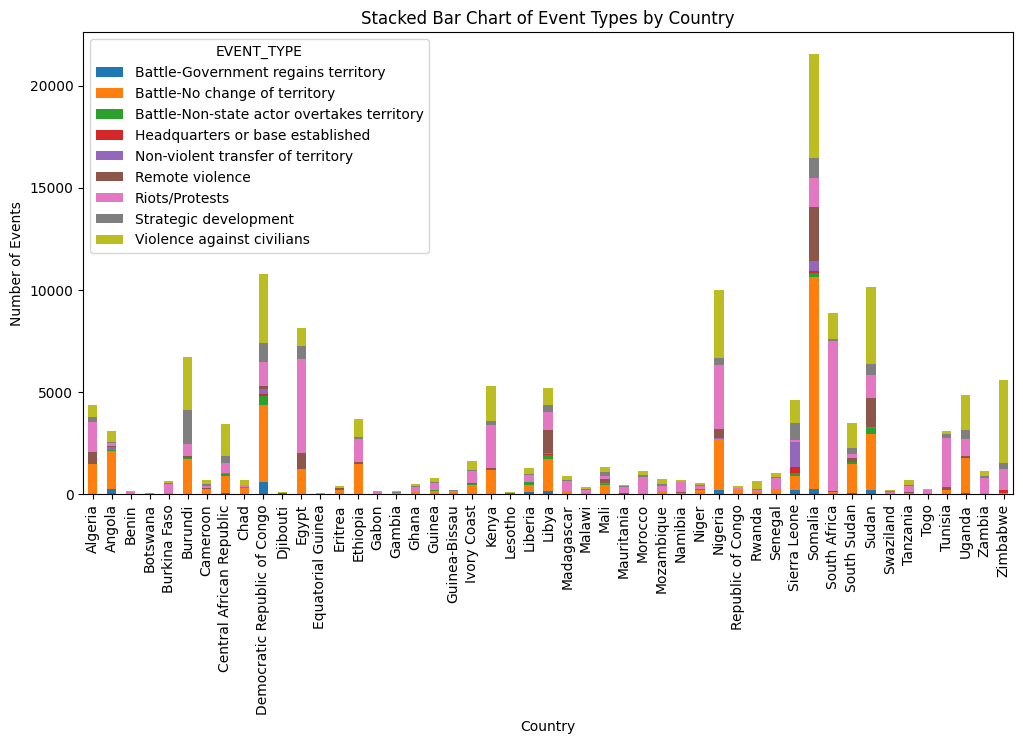

In [ ]:
# Stacked Bar Chart of Event Types by Country (Matplotlib)
# (Requires data manipulation to get counts of event types per country)
# Example (replace 'COUNTRY' with your actual country column):
event_counts = africadata.groupby(['COUNTRY', 'EVENT_TYPE'])['EVENT_COUNTRY_ID'].count().unstack()
event_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart of Event Types by Country')
plt.xlabel('Country')
plt.ylabel('Number of Events')

A bar chart to visualize the frequency of event types

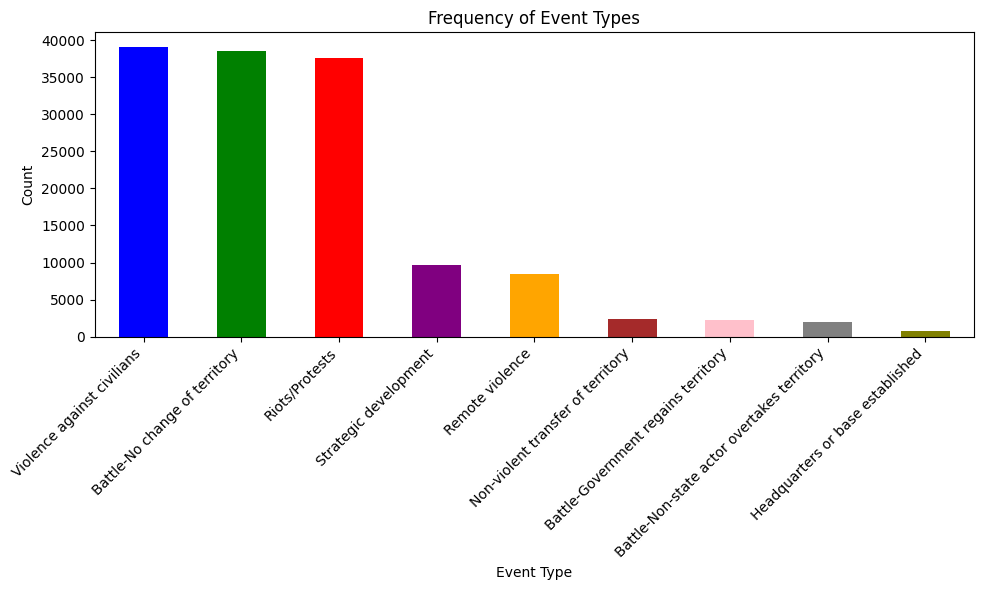

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Get the value counts and sort them in descending order
event_counts = africadata['EVENT_TYPE'].value_counts()

# Create a list of colors for the bars
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Plot the bar chart with different colors
event_counts.plot(kind='bar', color=colors)


plt.title('Frequency of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A pie chart to visualize event types by their percentage value.

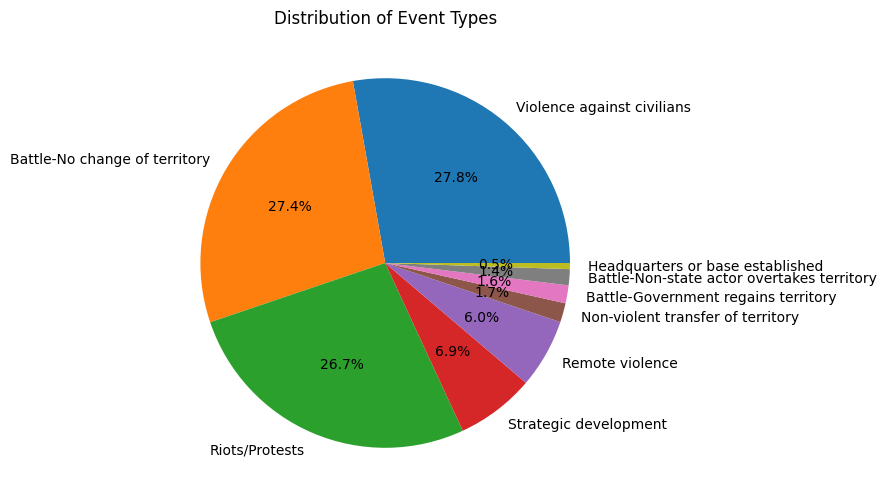

In [ ]:
plt.figure(figsize=(10, 6))
africadata['EVENT_TYPE'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Event Types')
plt.ylabel('')
plt.show()

# Exploring Numerical Features

A box and whisker plot for each numerical features.

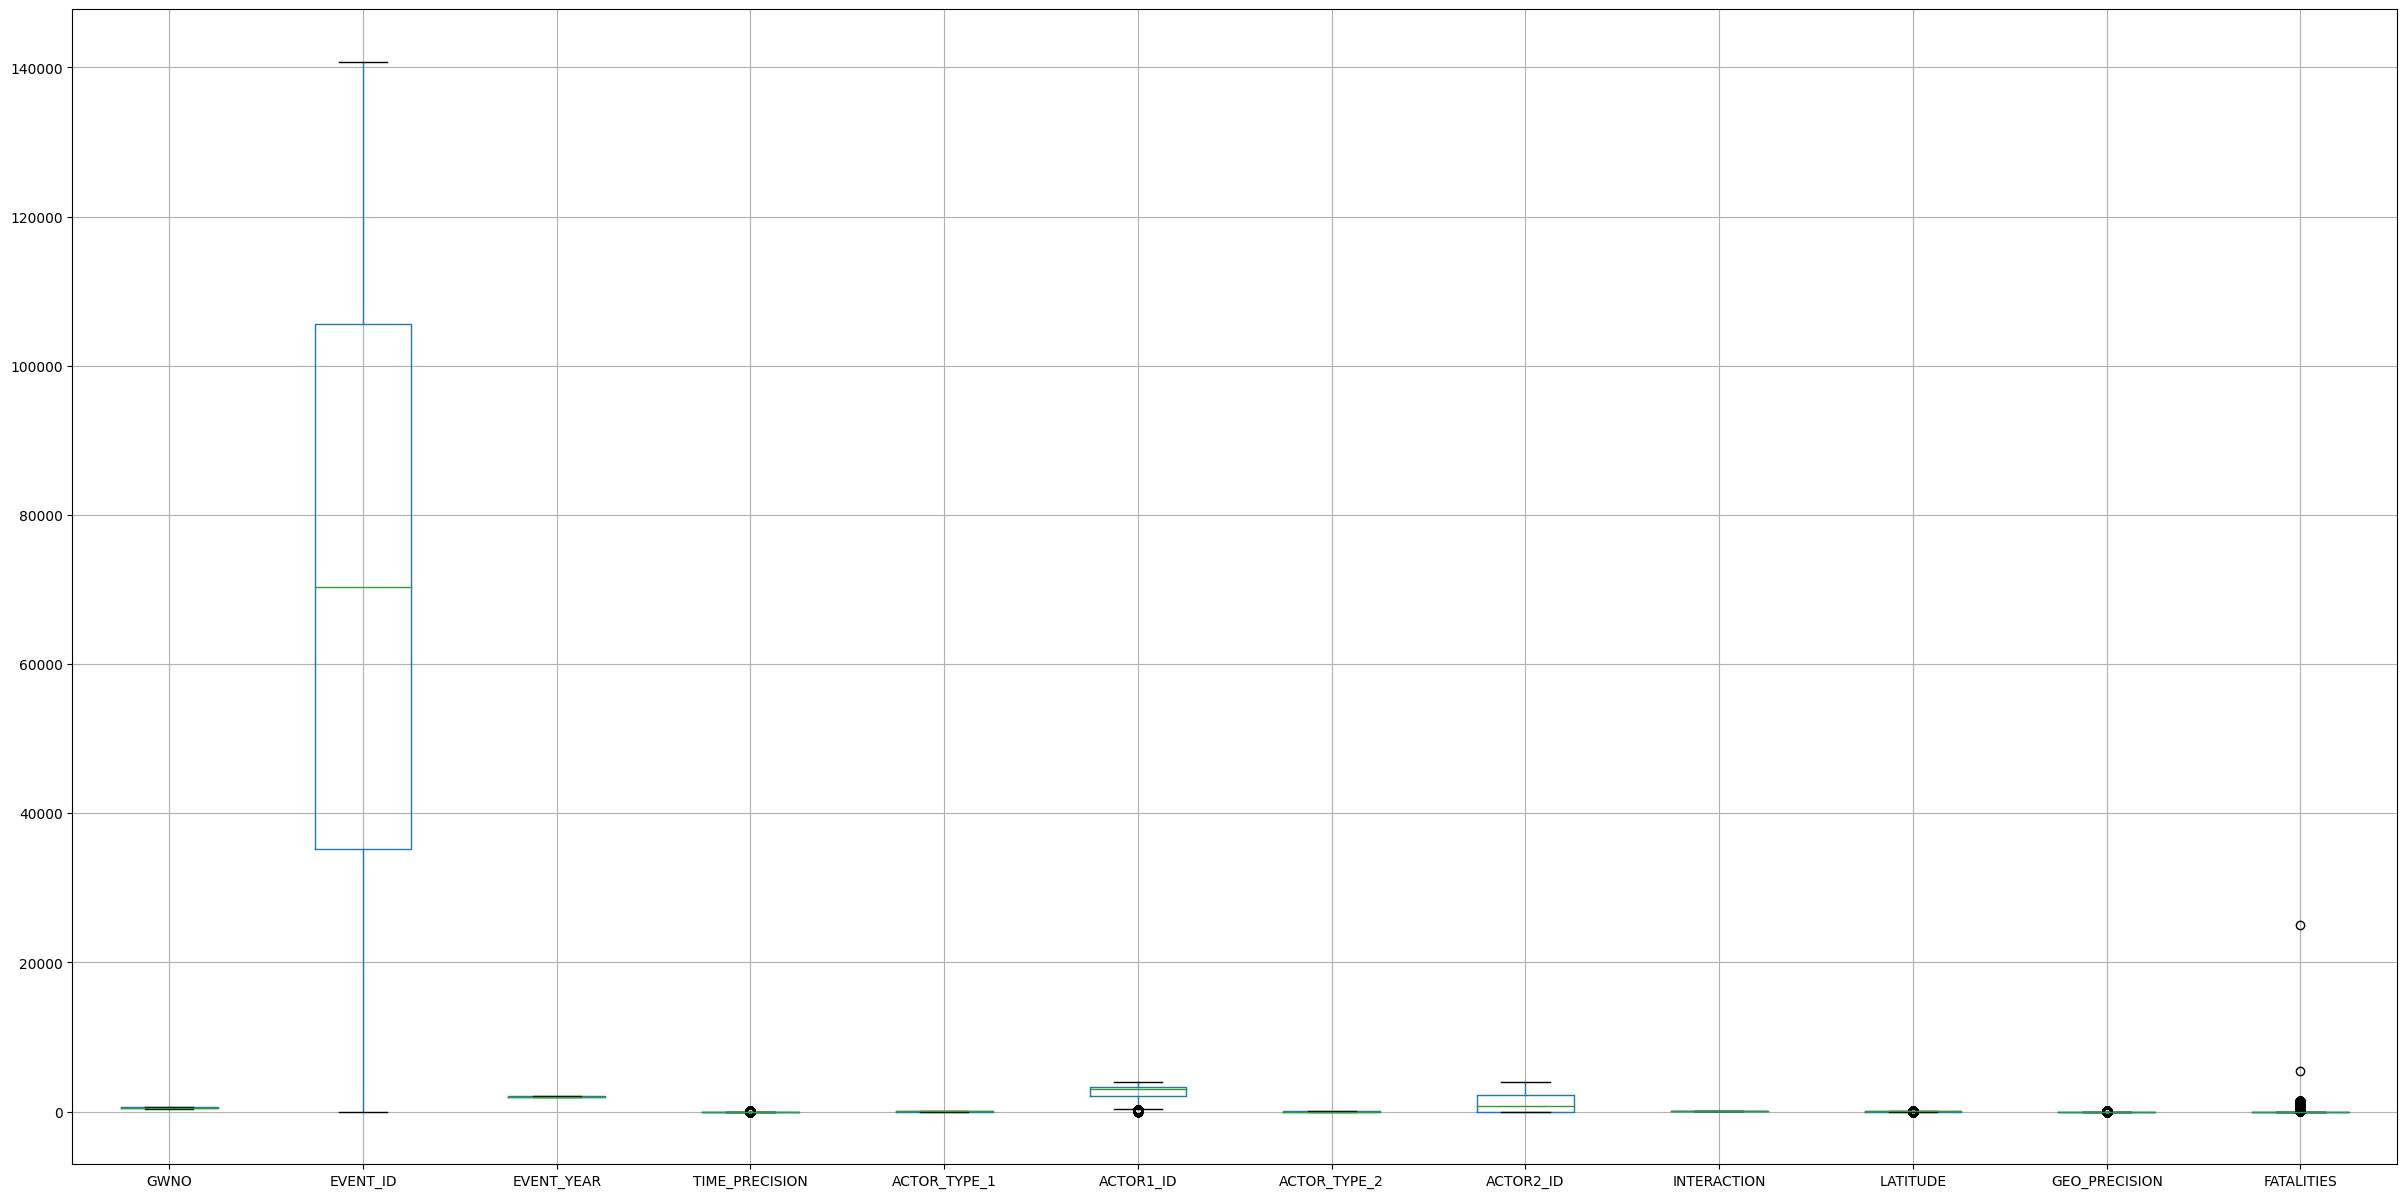

In [ ]:
africadata.boxplot(figsize=(30, 15))
plt.show()

A bar chart of total fatalities by year

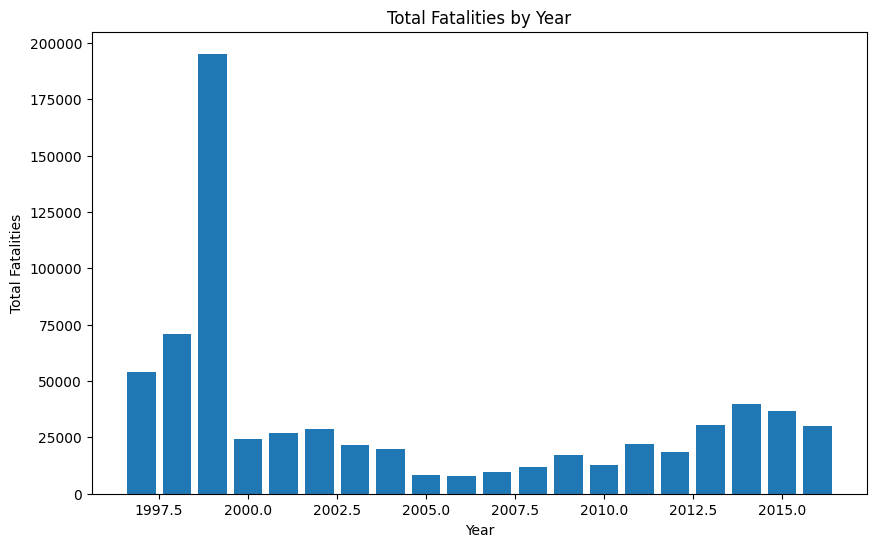

In [ ]:
# Convert 'EVENT_DATE' to datetime
africadata['EVENT_DATE'] = pd.to_datetime(africadata['EVENT_DATE'], format='mixed')

# Extract year from 'EVENT_DATE'
africadata['EVENT_YEAR'] = africadata['EVENT_DATE'].dt.year

# Group data by year and sum fatalities
fatalities_by_year = africadata.groupby('EVENT_YEAR')['FATALITIES'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(fatalities_by_year['EVENT_YEAR'], fatalities_by_year['FATALITIES'])
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.title('Total Fatalities by Year')
plt.show()

In [ ]:
africadata['ACTOR1'].unique()

array(['GIA: Armed Islamic Group',
       'Military Forces of Algeria (1994-1999)',
       'GSPC: Salafist Group for Call and Combat', ...,
       'Militia (Farmers)', 'Johanne Marange Apostolic Sect',
       'MDC-Renewal: Movement for Democratic Change (Biti Faction)'],
      dtype=object)

In [ ]:
africadata['ACTOR2'].unique()

array(['Civilians (Algeria)', 'FIS: Islamic Salvation Front',
       'GIA: Armed Islamic Group', ..., 'Militia (Farmers)',
       'Private Security Forces (Zimbabwe)', 'PF: People First'],
      dtype=object)

In [ ]:
africadata['ACTOR_TYPE_1'].unique()

array([2, 1, 8, 3, 6, 5, 4, 7])

In [ ]:
africadata['ACTOR_TYPE_2'].unique()

array([7, 3, 2, 1, 0, 8, 5, 6, 4])

# **PERFORMING ANALYSIS**

# Visualizing fatalities by actor type

A bar chart plot of fatality

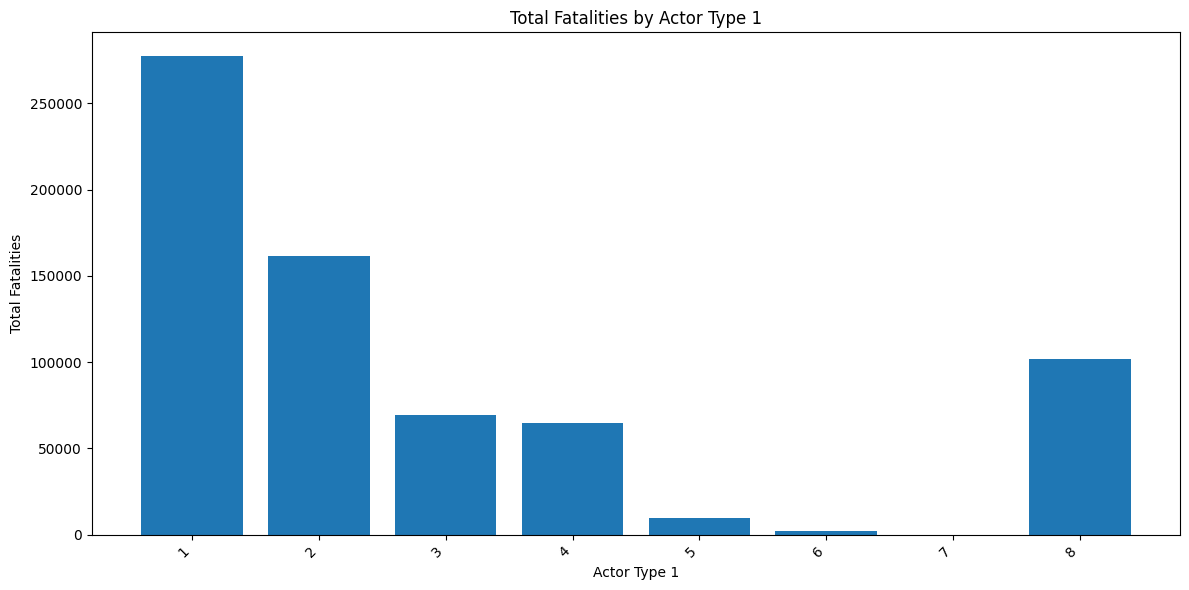

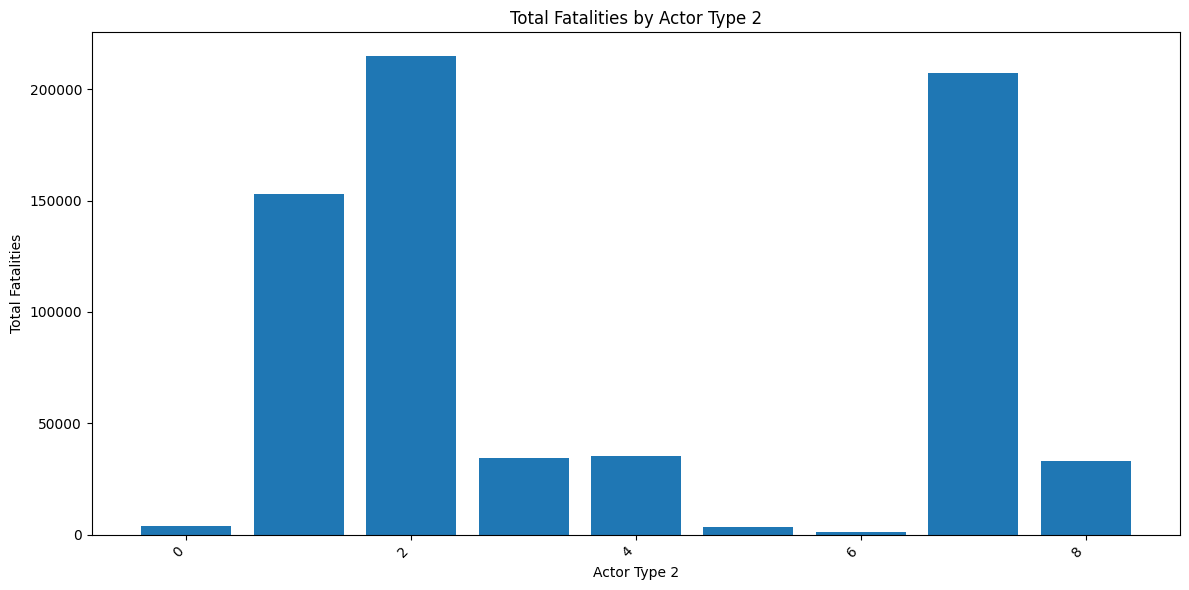

In [ ]:
fatalities_by_actor = africadata.groupby('ACTOR_TYPE_1')['FATALITIES'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(fatalities_by_actor['ACTOR_TYPE_1'], fatalities_by_actor['FATALITIES'])
plt.xlabel('Actor Type 1')
plt.ylabel('Total Fatalities')
plt.title('Total Fatalities by Actor Type 1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Group data by ACTOR_TYPE_2 and sum fatalities
fatalities_by_actor = africadata.groupby('ACTOR_TYPE_2')['FATALITIES'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(fatalities_by_actor['ACTOR_TYPE_2'], fatalities_by_actor['FATALITIES'])
plt.xlabel('Actor Type 2')
plt.ylabel('Total Fatalities')
plt.title('Total Fatalities by Actor Type 2')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A pie chart plot of fatality by event actors

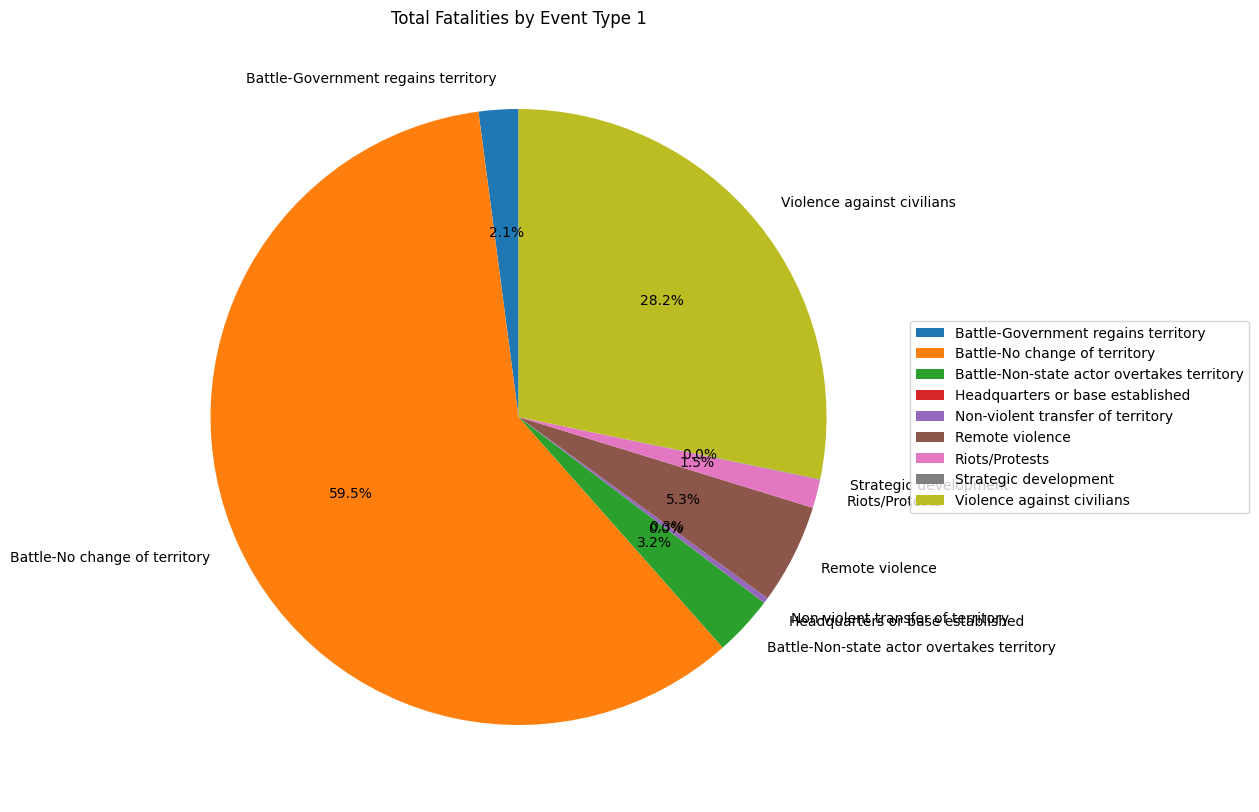

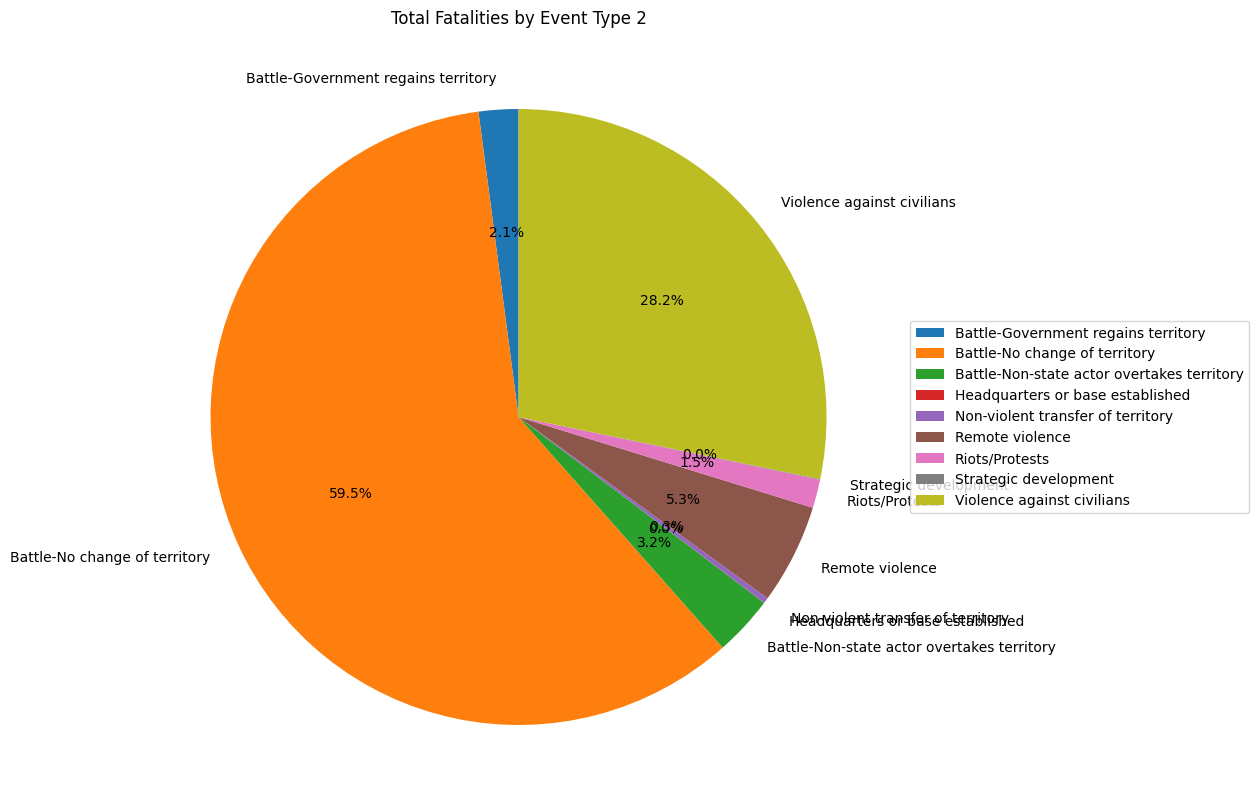

In [ ]:
# Group data by EVENT_TYPE and sum fatalities
fatalities_by_event_type1 = africadata.groupby('EVENT_TYPE')['FATALITIES'].sum()

# Create a pie chart for event type 1
plt.figure(figsize=(10, 10))
plt.pie(fatalities_by_event_type1, labels=fatalities_by_event_type1.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Fatalities by Event Type 1')
plt.legend(fatalities_by_event_type1.index, loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

# Group data by EVENT_TYPE 2 and sum fatalities (Assuming you have a column named 'EVENT_TYPE_2')
fatalities_by_event_type2 = africadata.groupby('EVENT_TYPE')['FATALITIES'].sum()

# Create a pie chart for event type 2
plt.figure(figsize=(10, 10))
plt.pie(fatalities_by_event_type2, labels=fatalities_by_event_type2.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Fatalities by Event Type 2')
plt.legend(fatalities_by_event_type2.index, loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

# Visualization of Geo data to identify hotspots of activity

This scatter plot helped me visualize the numeber of fatalities recorded per country on the continent.

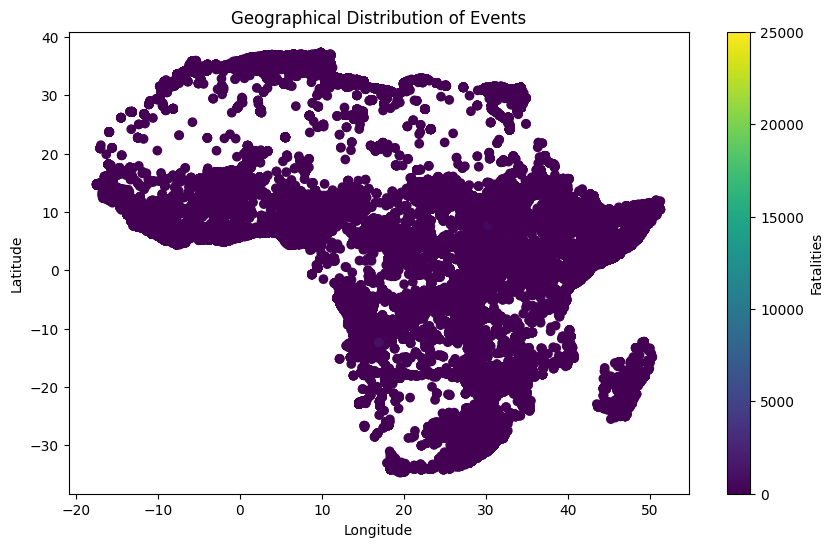

In [ ]:
# Here i convert 'LONGITUDE' and 'LATITUDE' columns to numeric, handling errors
africadata['LONGITUDE'] = pd.to_numeric(africadata['LONGITUDE'], errors='coerce')
africadata['LATITUDE'] = pd.to_numeric(africadata['LATITUDE'], errors='coerce')

# I then create a scatter plot of latitude and longitude, colored by 'FATALITIES'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(africadata['LONGITUDE'], africadata['LATITUDE'], c=africadata['FATALITIES'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Events')

# Add a colorbar to show the mapping between colors and 'FATALITIES'
plt.colorbar(scatter, label='Fatalities')

plt.show()

A Choropleth Map (GeoPandas) function. This helped me visualize the numeber of events recorded per country on the continent.

<ipython-input-184-caf195017b79>:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



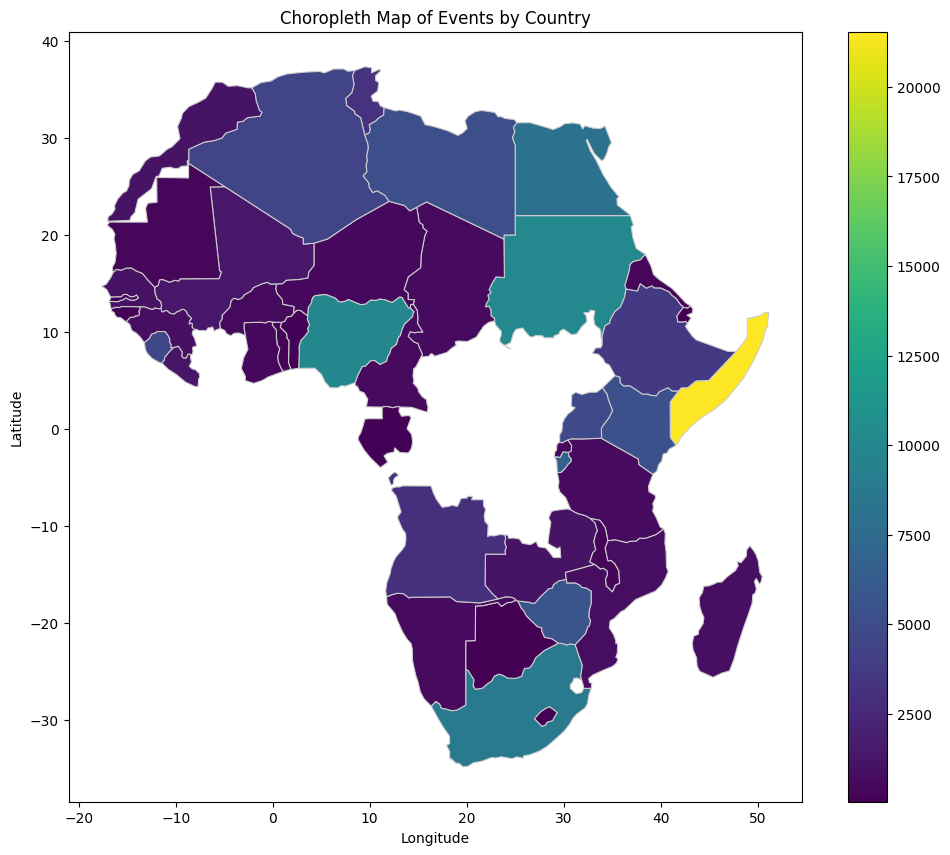

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
africa = world[world.continent == 'Africa']
events_by_country = africadata.groupby('COUNTRY')['EVENT_COUNTRY_ID'].count().reset_index()
merged_data = africa.merge(events_by_country, left_on='name', right_on='COUNTRY')
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_data.plot(column='EVENT_COUNTRY_ID', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Choropleth Map of Events by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Here i used the latitude and longitude columns to plot the interactive geo scatter map
fig = px.scatter_geo(africadata, lat='LATITUDE', lon='LONGITUDE', color='EVENT_TYPE',
hover_name='LOCATION', title='Point Map of Events')
fig.show()

# **Temporal Analysis**

Visualizing total events over time

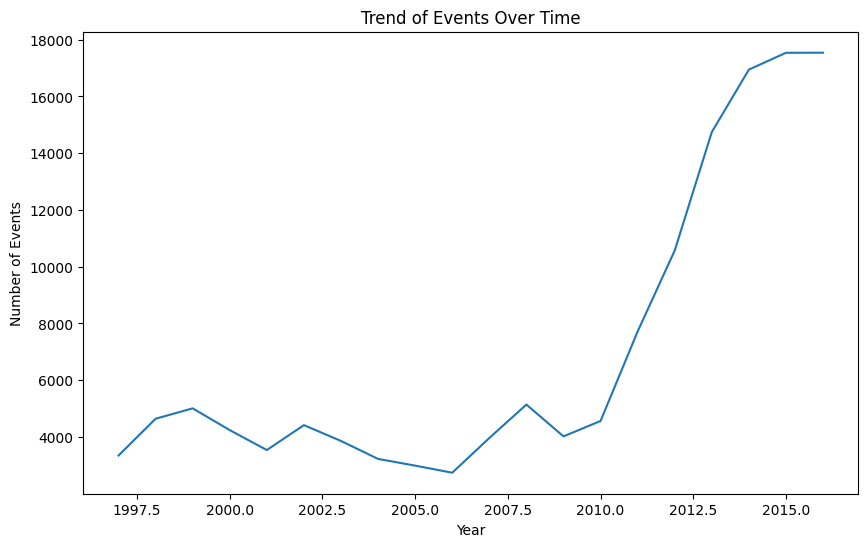

In [ ]:
# Convert 'EVENT_DATE' to datetime
africadata['EVENT_DATE'] = pd.to_datetime(africadata['EVENT_DATE'], format='mixed')

# Extract year from 'EVENT_DATE'
africadata['EVENT_YEAR'] = africadata['EVENT_DATE'].dt.year

# Group data by year and count events
events_by_year = africadata.groupby('EVENT_YEAR')['EVENT_ID'].count()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(events_by_year.index, events_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('Trend of Events Over Time')
plt.show()

Visualizing total events over time by country

In [ ]:
import plotly.express as px

#Convert 'EVENT_DATE' to datetime. Use infer_datetime_format to handle multiple date formats
africadata['EVENT_DATE'] = pd.to_datetime(africadata['EVENT_DATE'], format='mixed')

# Time Series of Events Over Time (with Plotly)
events_over_time = africadata.groupby('EVENT_DATE')['EVENT_COUNTRY_ID'].count().reset_index()

fig = px.line(events_over_time, x='EVENT_DATE', y='EVENT_COUNTRY_ID', title='Number of Events Over Time') # Also update here
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Number of Events over time by event type

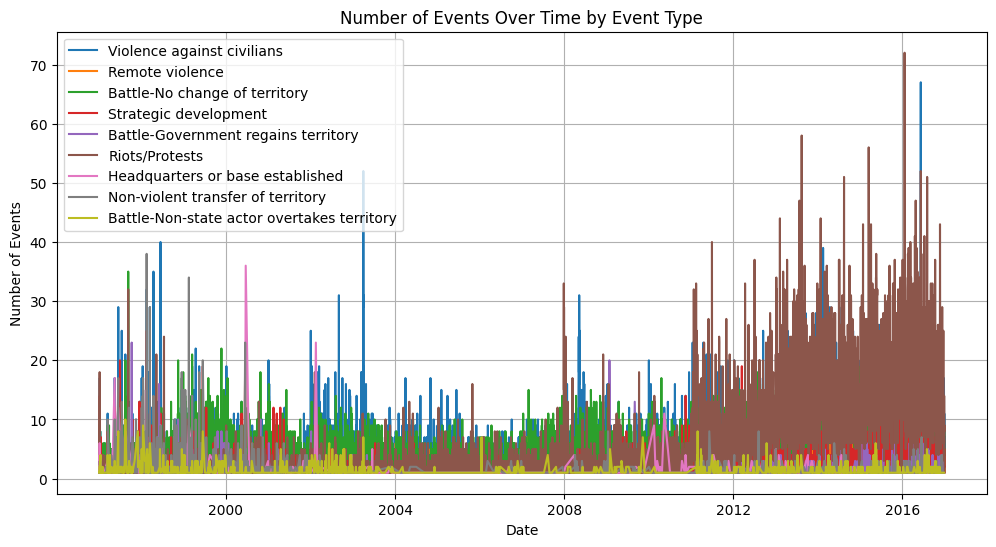

In [ ]:
# Time Series with Event Type Segmentation (Matplotlib)
plt.figure(figsize=(12, 6))
for event_type in africadata['EVENT_TYPE'].unique():
  df_temp = africadata[africadata['EVENT_TYPE'] == event_type].groupby('EVENT_DATE')['EVENT_COUNTRY_ID'].count()
  plt.plot(df_temp, label=event_type)
plt.title('Number of Events Over Time by Event Type')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

Visualization of country and total fatalities

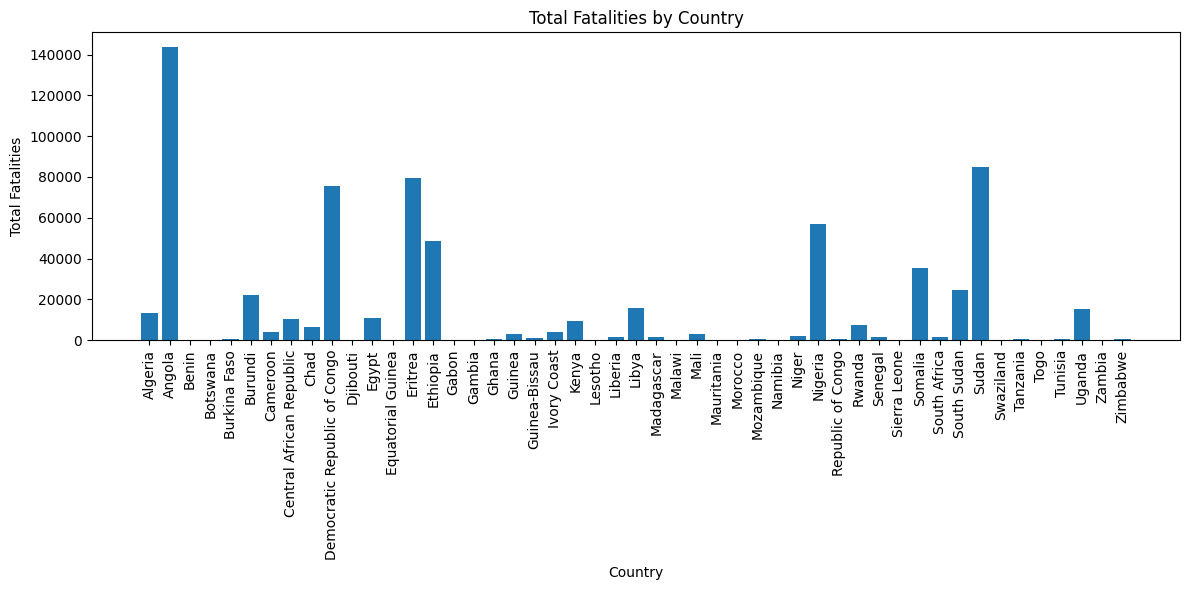

In [17]:
fatalities_by_country = africadata.groupby('COUNTRY')['FATALITIES'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(fatalities_by_country['COUNTRY'], fatalities_by_country['FATALITIES'])
plt.xlabel('Country')
plt.ylabel('Total Fatalities')
plt.title('Total Fatalities by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Representation of the relationships between different actors involved in conflicts.:

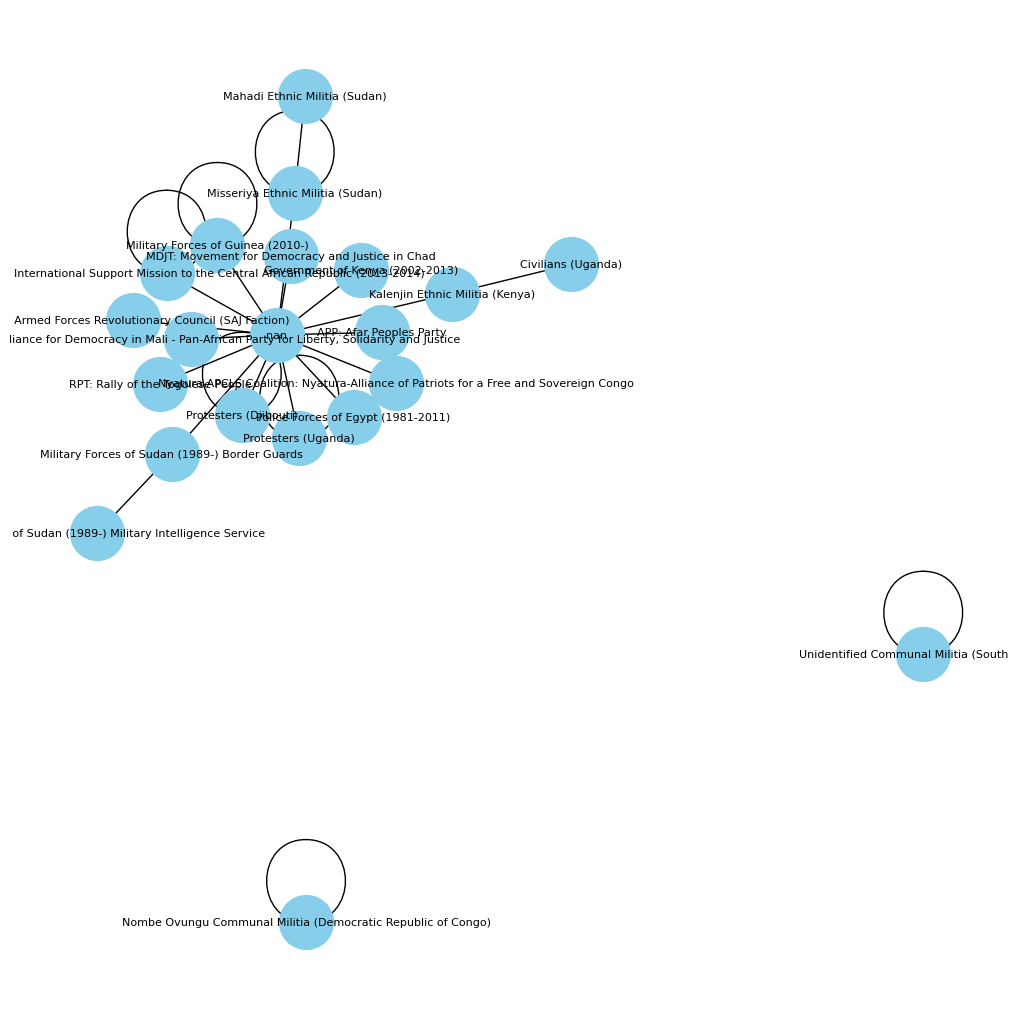

In [16]:
import networkx as nx
import random

# Assuming 'ACTOR1' and 'ACTOR2' are your actor columns
data = africadata[['ACTOR1', 'ACTOR2']]

# Sample a subset of actors
unique_actors = list(set(data['ACTOR1'].unique()).union(data['ACTOR2'].unique()))
sampled_actors = random.sample(unique_actors, 100)  # Sample 10 actors

# Filter data to include only sampled actors
sampled_data = data[data['ACTOR1'].isin(sampled_actors) & data['ACTOR2'].isin(sampled_actors)]

# Create a graph from the sampled data
G = nx.from_pandas_edgelist(sampled_data, source='ACTOR1', target='ACTOR2')

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", font_size=8)
plt.show()

# **Word Clouds**
  
The functionality of Pandas has helped me to highlight the most frequent words used in event descriptions of conflicts. Here I have created a word cloud from the 'DESCRPITION column to see the dominant words associated with specific event types or time periods.

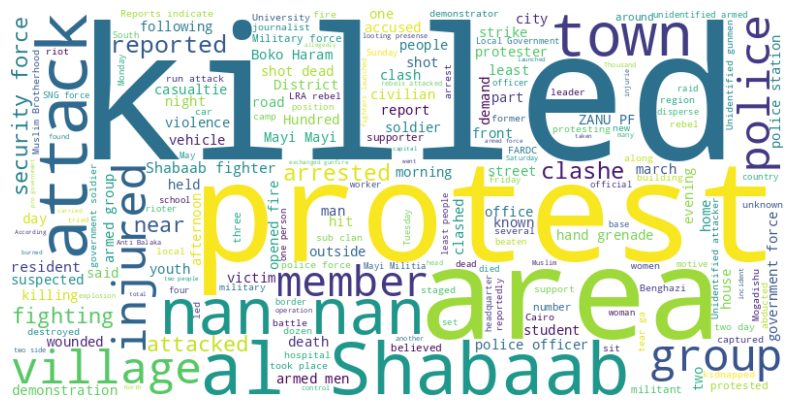

In [7]:
!pip install networkx
text = ' '.join(africadata['DESCRIPTION'].astype(str).tolist())
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **CONCLUSION**

This marks the end of my Exploratory data analysis of the africa crimes dataset. A report has been compiled that explains my thought process and uploaded to my github for reference.